In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [29]:
milk = pd.read_csv("C:\\Aalesh and Mandar\\Datasets\\nutrient.csv", index_col = 0)

In [30]:
scalar = StandardScaler()

In [31]:
scaled_milk = scalar.fit_transform(milk)
scaled_milk

array([[ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.1523851 ],
       [ 0.37851533,  0.47936128,  0.31851589, -0.45658134,  0.22212065],
       [ 2.14056947, -0.95872255,  2.31007839, -0.48269934, -0.26602823],
       [ 1.68746984,  0.        ,  1.67639941, -0.45658134,  0.1523851 ],
       [-0.27596192,  0.71904192, -0.31516309, -0.35210934,  0.9194762 ],
       [-0.93043917,  0.23968064, -0.94884207, -0.46964034, -0.68444155],
       [-0.37665073,  1.43808383, -0.58673979, -0.41740434, -0.614706  ],
       [-0.47733953,  1.67776447, -0.76779093, -0.39128634,  2.45365839],
       [ 0.57989295,  0.23968064,  0.59009259, -0.45658134,  0.1523851 ],
       [ 0.93230378, -0.23968064,  1.04272043, -0.45658134, -0.05682156],
       [ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.08264955],
       [ 1.33505901,  0.        ,  1.40482271, -0.45658134,  0.08264955],
       [ 1.48609222,  0.        ,  1.49534827, -0.45658134,  0.01291399],
       [-0.0242399 , -0.23968064,  0.0

In [32]:
km = KMeans(n_clusters=4, random_state = 100)
km.fit(scaled_milk)

KMeans(n_clusters=4, random_state=100)

In [33]:
labels = km.predict(scaled_milk)

In [34]:
milk["Cluster"] = labels

In [35]:
milk

,energy,protein,fat,calcium,iron,Cluster
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,0
HAMBURGER,245,21,17,9,2.7,2
BEEF ROAST,420,15,39,7,2.0,0
BEEF STEAK,375,19,32,9,2.6,0
BEEF CANNED,180,22,10,17,3.7,2
CHICKEN BROILED,115,20,3,8,1.4,2
CHICKEN CANNED,170,25,7,12,1.5,2
BEEF HEART,160,26,5,14,5.9,2
LAMB LEG ROAST,265,20,20,9,2.6,0


In [36]:
milk.groupby("Cluster").mean()

,energy,protein,fat,calcium,iron
Cluster,,,,,
0,341.875000,18.750000,28.875000,8.750000,2.437500
1,151.666667,18.333333,7.666667,227.666667,1.666667
2,163.928571,20.714286,7.714286,19.857143,2.028571
3,57.500000,9.000000,1.000000,78.000000,5.700000


In [37]:
km.inertia_

42.400372873132625

In [42]:
wss = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_milk)
    wss.append(km.inertia_)

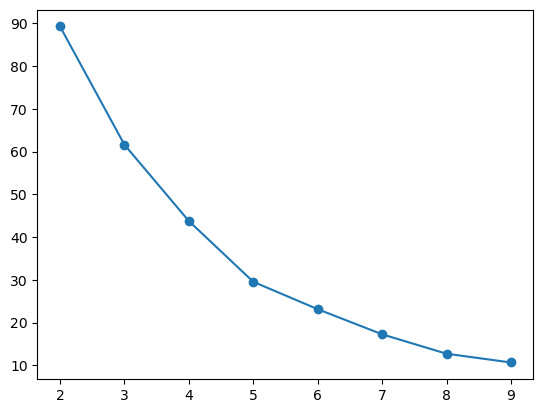

In [43]:
plt.scatter(np.arange(2,10), wss)
plt.plot(np.arange(2,10), wss)

In [44]:
sil = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_milk)
    labels = km.predict(scaled_milk)
    sil.append(silhouette_score(scaled_milk, labels))

In [45]:
ks = np.arange(2,10)
i_max = np.argmax(sil)
best_k = ks[i_max]
print("Best K = ",best_k)

Best K =  4
